In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dark-circles/Dark Circles/valid/labels/_288_jpg.rf.f4a3b8e5ce4fb8b2c82cb589bf867355.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/_329_jpg.rf.49e48985b768ca892695a674afca7c8c.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/_213_jpg.rf.178d287ac405abd3412965672bb076c2.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/Screenshot-2025-02-02-132753_png.rf.cdf82caa98d24a8b8bf6f60eade5fb29.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/B_337_jpg.rf.a59ebe7a417854f5385a922b93073e50.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/B_310_jpg.rf.2ecefb1205ef2b9f81e013d2878714ec.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/_445_jpg.rf.c6333379da7b2d293b30892ae8036cfe.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/_250_jpg.rf.0fe03dbaa692a132e0fd219450f1ee6f.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/B_198_jpg.rf.ffac8c7d377fde94a4de7f93e8b3b5be.txt
/kaggle/input/dark-circles/Dark Circles/valid/labels/_2

In [2]:
import os
import shutil

# 1. نسخ الداتا من input إلى working (قابلة للتعديل)
source_dir = "/kaggle/input/dark-circles/Dark Circles"
target_dir = "/kaggle/working/DarkCircles"

shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

# 2. تعديل كل ملفات labels في train/valid/test وتحويل class إلى 0
for split in ["train", "valid", "test"]:
    labels_dir = os.path.join(target_dir, split, "labels")
    for filename in os.listdir(labels_dir):
        if filename.endswith(".txt"):
            path = os.path.join(labels_dir, filename)
            with open(path, "r") as f:
                lines = f.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                parts[0] = "0"  # تحويل class إلى 0
                new_lines.append(" ".join(parts))

            with open(path, "w") as f:
                f.write("\n".join(new_lines))


In [3]:
# إنشاء ملف data.yaml
data_yaml = """
train: /kaggle/working/DarkCircles/train/images
val: /kaggle/working/DarkCircles/valid/images

nc: 1
names: ["Dark Circles"]
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)


In [4]:
!pip install ultralytics --quiet
from ultralytics import YOLO

# تحميل نموذج YOLOv8 الخفيف
model = YOLO("yolov8s.pt")

# تدريب النموذج
model.train(
    data="data.yaml",
    epochs=70,
    imgsz=640,
    batch=8,
    name="darkcircles_yolo"
)

# تقييم النموذج
results = model.val()
print(results)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 6.0 MB/s eta 0:00:000:00:0100:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.c

100%|██████████| 21.5M/21.5M [00:00<00:00, 163MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=darkcircles_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 69.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 654.3±402.2 MB/s, size: 27.1 KB)


train: Scanning /kaggle/working/DarkCircles/train/labels... 1735 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1735/1735 [00:01<00:00, 1158.88it/s]


train: New cache created: /kaggle/working/DarkCircles/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 392.7±294.9 MB/s, size: 24.0 KB)


val: Scanning /kaggle/working/DarkCircles/valid/labels... 335 images, 0 backgrounds, 0 corrupt: 100%|██████████| 335/335 [00:00<00:00, 1175.26it/s]


val: New cache created: /kaggle/working/DarkCircles/valid/labels.cache
Plotting labels to runs/detect/darkcircles_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/darkcircles_yolo
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      1.97G     0.8293      1.355        1.4         16        640: 100%|██████████| 217/217 [00:34<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.62it/s]


                   all        335        453       0.27      0.397      0.147      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.39G     0.8299      1.028      1.392         20        640: 100%|██████████| 217/217 [00:31<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.69it/s]


                   all        335        453      0.716      0.413      0.437      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.43G     0.8253      1.037      1.405         15        640: 100%|██████████| 217/217 [00:31<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.51it/s]


                   all        335        453      0.804      0.442      0.498      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.46G     0.7583      0.962      1.355         21        640: 100%|██████████| 217/217 [00:31<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.63it/s]

                   all        335        453      0.739      0.448      0.527      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70       2.5G     0.7399      0.921      1.361         15        640: 100%|██████████| 217/217 [00:32<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.57it/s]

                   all        335        453      0.809      0.439      0.496      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.53G      0.707     0.8719      1.332         25        640: 100%|██████████| 217/217 [00:32<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.66it/s]

                   all        335        453      0.702      0.501      0.564      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.57G     0.6907      0.825      1.312         20        640: 100%|██████████| 217/217 [00:32<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.35it/s]

                   all        335        453       0.81      0.443      0.544      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.61G     0.7028     0.8533      1.326         22        640: 100%|██████████| 217/217 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.70it/s]

                   all        335        453      0.765      0.495      0.579      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.64G     0.6822     0.8239      1.311         22        640: 100%|██████████| 217/217 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.60it/s]

                   all        335        453       0.82      0.442      0.568      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.68G     0.6988      0.809      1.323         17        640: 100%|██████████| 217/217 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.59it/s]

                   all        335        453      0.746      0.519      0.584      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.72G     0.6499     0.7778       1.29         23        640: 100%|██████████| 217/217 [00:32<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.71it/s]

                   all        335        453      0.726      0.497      0.568      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      2.75G     0.6805       0.81      1.312         26        640: 100%|██████████| 217/217 [00:32<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.64it/s]

                   all        335        453      0.839      0.446       0.56      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.79G     0.6468      0.748      1.288         23        640: 100%|██████████| 217/217 [00:32<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.58it/s]

                   all        335        453      0.743       0.51      0.602       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.99G     0.6471     0.7578      1.285         22        640: 100%|██████████| 217/217 [00:32<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.68it/s]

                   all        335        453      0.751      0.533      0.595      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      3.02G     0.6404      0.735      1.284         30        640: 100%|██████████| 217/217 [00:32<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.69it/s]

                   all        335        453      0.699      0.523      0.601      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      3.06G     0.6162     0.7183       1.27         22        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.46it/s]

                   all        335        453      0.688      0.521      0.604      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70       3.1G     0.6346     0.7153      1.284         17        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.74it/s]

                   all        335        453      0.691      0.561      0.604      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      3.13G     0.6343     0.7525      1.283         20        640: 100%|██████████| 217/217 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.68it/s]

                   all        335        453      0.744      0.545      0.623       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      3.17G     0.6379     0.7327      1.287         22        640: 100%|██████████| 217/217 [00:32<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.72it/s]

                   all        335        453      0.659      0.567      0.607      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      3.21G     0.6146      0.708      1.271         25        640: 100%|██████████| 217/217 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.76it/s]

                   all        335        453       0.71       0.55      0.618      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      3.24G     0.5976     0.6928      1.255         22        640: 100%|██████████| 217/217 [00:32<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.59it/s]

                   all        335        453      0.716      0.532      0.595       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      3.28G     0.6216     0.7091      1.272         24        640: 100%|██████████| 217/217 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.70it/s]

                   all        335        453      0.748      0.512      0.608      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      3.31G     0.6146     0.6986      1.273         25        640: 100%|██████████| 217/217 [00:31<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.73it/s]

                   all        335        453       0.76      0.532      0.631      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      3.35G     0.6181     0.6901      1.275         18        640: 100%|██████████| 217/217 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.74it/s]

                   all        335        453      0.718      0.539      0.618      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70       3.4G     0.6172     0.6964      1.267         19        640: 100%|██████████| 217/217 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.51it/s]

                   all        335        453      0.742      0.545      0.623      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      3.48G     0.6351     0.7275      1.286         19        640: 100%|██████████| 217/217 [00:32<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.75it/s]

                   all        335        453      0.727      0.567      0.633       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      3.79G     0.5954     0.6693      1.253         24        640: 100%|██████████| 217/217 [00:32<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.62it/s]

                   all        335        453      0.702      0.588      0.639      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      3.82G     0.6007     0.7004       1.26         18        640: 100%|██████████| 217/217 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.85it/s]

                   all        335        453      0.732       0.55      0.625      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      3.86G     0.6063     0.6883      1.245         24        640: 100%|██████████| 217/217 [00:32<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.74it/s]

                   all        335        453      0.715      0.553      0.625      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      3.89G     0.5942     0.6802      1.251         16        640: 100%|██████████| 217/217 [00:32<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.54it/s]

                   all        335        453      0.743      0.578       0.65      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      3.93G      0.588     0.6717      1.258         17        640: 100%|██████████| 217/217 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.71it/s]

                   all        335        453      0.761      0.574      0.644      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      3.97G     0.5976     0.6839      1.245         33        640: 100%|██████████| 217/217 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.68it/s]

                   all        335        453      0.741      0.541      0.626      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70         4G     0.5907      0.684      1.259         21        640: 100%|██████████| 217/217 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.70it/s]

                   all        335        453      0.663      0.566      0.638      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      4.04G     0.5819     0.6586      1.243         27        640: 100%|██████████| 217/217 [00:32<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.50it/s]

                   all        335        453      0.715      0.576       0.64      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      4.24G     0.5948     0.6743      1.245         25        640: 100%|██████████| 217/217 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.66it/s]

                   all        335        453      0.708      0.574       0.64       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      4.27G     0.5819     0.6694      1.246         20        640: 100%|██████████| 217/217 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.64it/s]

                   all        335        453       0.72      0.596      0.646      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      4.31G     0.5761     0.6563      1.241         20        640: 100%|██████████| 217/217 [00:32<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.57it/s]

                   all        335        453      0.738      0.578      0.654      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      4.35G     0.5819     0.6509      1.256         18        640: 100%|██████████| 217/217 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.66it/s]

                   all        335        453      0.707      0.578      0.646      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      4.38G     0.5713      0.628       1.25         13        640: 100%|██████████| 217/217 [00:32<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.55it/s]

                   all        335        453        0.7      0.572      0.645      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      4.42G     0.5839     0.6587      1.246         21        640: 100%|██████████| 217/217 [00:32<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.58it/s]

                   all        335        453      0.681      0.598      0.644      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      4.46G     0.5589     0.6337      1.232         18        640: 100%|██████████| 217/217 [00:32<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.72it/s]

                   all        335        453      0.731      0.603      0.648      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      4.52G     0.5737     0.6407      1.234         24        640: 100%|██████████| 217/217 [00:32<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.58it/s]

                   all        335        453      0.747      0.581      0.653      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      4.59G     0.5753     0.6465      1.238         15        640: 100%|██████████| 217/217 [00:32<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.36it/s]

                   all        335        453      0.712      0.583      0.646      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      4.79G     0.5603      0.618       1.23         24        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.76it/s]

                   all        335        453      0.719      0.615       0.65      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      4.83G     0.5869     0.6494      1.247         20        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.49it/s]

                   all        335        453      0.739      0.605      0.659      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      4.87G     0.5525     0.6014      1.227         21        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.84it/s]

                   all        335        453      0.758      0.621      0.669      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      5.06G     0.5741     0.6315       1.24         20        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.72it/s]

                   all        335        453      0.744      0.617      0.669       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70       5.1G     0.5664     0.6312      1.243         26        640: 100%|██████████| 217/217 [00:32<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.77it/s]

                   all        335        453      0.748      0.592      0.657      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      5.14G     0.5592      0.609      1.235         20        640: 100%|██████████| 217/217 [00:32<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.83it/s]

                   all        335        453      0.739      0.636       0.68      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      5.17G     0.5854     0.6279      1.241         21        640: 100%|██████████| 217/217 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.75it/s]

                   all        335        453      0.738      0.638      0.669      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      5.21G     0.5334     0.5735      1.215         22        640: 100%|██████████| 217/217 [00:32<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.70it/s]

                   all        335        453      0.742      0.629      0.667      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      5.25G     0.5737     0.6266      1.242         19        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.50it/s]

                   all        335        453      0.751      0.623      0.672      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      5.28G     0.5525     0.5962      1.231         19        640: 100%|██████████| 217/217 [00:32<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.80it/s]

                   all        335        453      0.735      0.625       0.66      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      5.32G     0.5524     0.5957      1.225         21        640: 100%|██████████| 217/217 [00:32<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.67it/s]

                   all        335        453      0.697      0.627      0.662      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      5.36G     0.5591     0.6035      1.232         28        640: 100%|██████████| 217/217 [00:32<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.80it/s]

                   all        335        453      0.732      0.629       0.67      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      5.43G     0.5356     0.6024      1.209         19        640: 100%|██████████| 217/217 [00:32<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.72it/s]

                   all        335        453      0.743      0.598      0.662       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      5.48G     0.5546     0.5984      1.234         19        640: 100%|██████████| 217/217 [00:32<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.77it/s]

                   all        335        453      0.764      0.651      0.675      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      5.57G     0.5452     0.5858      1.224         11        640: 100%|██████████| 217/217 [00:32<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.93it/s]

                   all        335        453      0.727      0.595      0.661      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      5.62G     0.5635     0.6034      1.224         27        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.83it/s]

                   all        335        453      0.724      0.631      0.669      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70       5.7G     0.5414     0.5784      1.219         23        640: 100%|██████████| 217/217 [00:32<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.68it/s]

                   all        335        453      0.743      0.634      0.668      0.491


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      5.89G     0.6549     0.7166      1.378          7        640: 100%|██████████| 217/217 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.63it/s]

                   all        335        453      0.738      0.635      0.671      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      5.93G     0.6443     0.6547      1.364          8        640: 100%|██████████| 217/217 [00:31<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.51it/s]

                   all        335        453      0.749      0.638      0.677      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      5.96G     0.6385     0.6404      1.365          8        640: 100%|██████████| 217/217 [00:31<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.66it/s]

                   all        335        453      0.726      0.655      0.672      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70         6G     0.6261     0.6394      1.372          7        640: 100%|██████████| 217/217 [00:31<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.80it/s]

                   all        335        453      0.731       0.64      0.672      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      6.04G     0.6208      0.632       1.35         15        640: 100%|██████████| 217/217 [00:31<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.67it/s]

                   all        335        453      0.734      0.645      0.672      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      6.08G     0.6145     0.6138      1.364          7        640: 100%|██████████| 217/217 [00:31<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.52it/s]

                   all        335        453      0.758      0.649       0.68      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      6.13G     0.6195     0.6178      1.351         10        640: 100%|██████████| 217/217 [00:31<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.60it/s]

                   all        335        453      0.762      0.642      0.683      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70       6.2G     0.6099     0.6053      1.344         11        640: 100%|██████████| 217/217 [00:31<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.71it/s]

                   all        335        453      0.775      0.645      0.688      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      6.25G     0.6054     0.6044      1.348          7        640: 100%|██████████| 217/217 [00:31<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.69it/s]

                   all        335        453      0.749      0.658      0.681      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      6.45G     0.5935     0.5875       1.34         10        640: 100%|██████████| 217/217 [00:31<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.90it/s]

                   all        335        453      0.746      0.648       0.68      0.495



70 epochs completed in 0.698 hours.
Optimizer stripped from runs/detect/darkcircles_yolo/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/darkcircles_yolo/weights/best.pt, 22.5MB

Validating runs/detect/darkcircles_yolo/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.86it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        335        453      0.747       0.66      0.681      0.498
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/darkcircles_yolo
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 550.7±223.7 MB/s, size: 23.8 KB)


val: Scanning /kaggle/working/DarkCircles/valid/labels.cache... 335 images, 0 backgrounds, 0 corrupt: 100%|██████████| 335/335 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:05<00:00,  7.60it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        335        453      0.747       0.66      0.681      0.498
Speed: 0.7ms preprocess, 10.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/darkcircles_yolo2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae02d63d190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.0320

In [5]:
# تقييم الموديل

print(f"Precision: {results.box.p}")
print(f"Recall: {results.box.r}")
print(f"mAP@0.5: {results.box.map50}")
print(f"mAP@0.5:0.95: {results.box.map}")



Precision: [    0.74736]
Recall: [    0.66004]
mAP@0.5: 0.6809586634188431
mAP@0.5:0.95: 0.4976467997906197



image 1/1 /kaggle/input/dark-circles/Dark Circles/test/images/Comment-se-debarrasser-des-cernes-bleus-pour-toujours-scaled_jpg.rf.7aa0b8b077eb4481038033ddc8d3e483.jpg: 640x640 2 Dark Circless, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/darkcircles_yolo13
📂 ملفات YOLO الناتجة: ['Comment-se-debarrasser-des-cernes-bleus-pour-toujours-scaled_jpg.rf.7aa0b8b077eb4481038033ddc8d3e483.jpg']


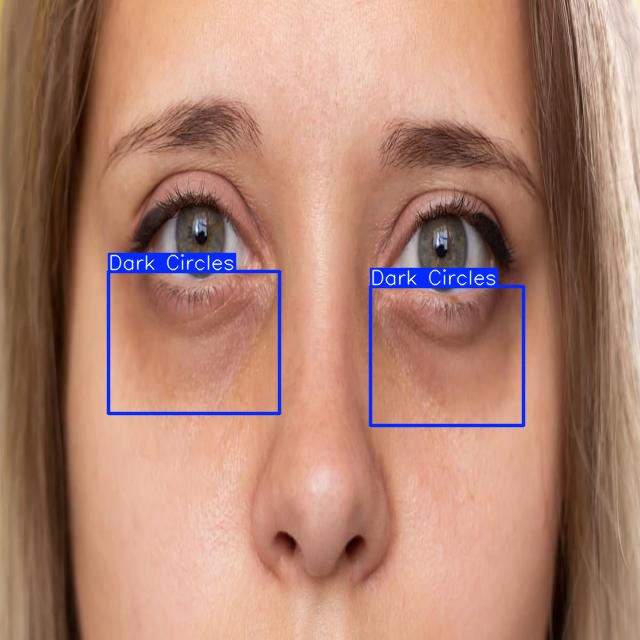

In [31]:
from IPython.display import Image, display

# التنبؤ على صورة اختبار
results = model.predict(
    source="/kaggle/input/dark-circles/Dark Circles/test/images/Comment-se-debarrasser-des-cernes-bleus-pour-toujours-scaled_jpg.rf.7aa0b8b077eb4481038033ddc8d3e483.jpg",  # ← غيّري الاسم حسب صورة فعلية عندك
    conf=0.3,
    save=True,
    show_conf=False 
)

# استخراج مجلد الإخراج
output_dir = results[0].save_dir
files = os.listdir(output_dir)
print("📂 ملفات YOLO الناتجة:", files)

# عرض أول صورة متوقعة
image_files = [f for f in files if f.lower().endswith((".jpg", ".jpeg", ".png"))]
if image_files:
    image_path = os.path.join(output_dir, image_files[0])
    display(Image(filename=image_path))
else:
    print("❌ لم يتم العثور على أي صورة في مجلد النتائج.")


In [7]:
# حفظ النموذج باسم معين في مكان مخصص
model.save("/kaggle/working/DarkCircles_yolov8.pt")

In [20]:
import shutil

# Path of the new image to test
original_path = "/kaggle/input/imagesdarckcircles/Dark Circles3.png"

# We'll copy the image to another path to use it in prediction
uploaded_path = "/kaggle/working/input_image.jpg"

# Copy the image from its original location
shutil.copy(original_path, uploaded_path)
print("Image copied:", uploaded_path)


Image copied: /kaggle/working/input_image.jpg


In [25]:
results = model.predict(
    source=uploaded_path,
    conf=0.2,
    save=True,
    show_conf=False 
)



image 1/1 /kaggle/working/input_image.jpg: 640x480 2 Dark Circless, 12.2ms
Speed: 2.5ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/darkcircles_yolo10


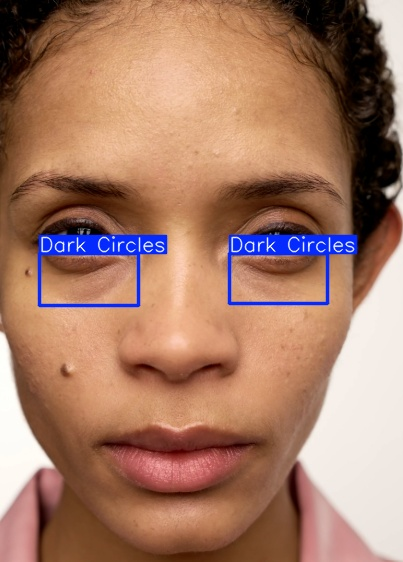

In [26]:
from IPython.display import Image, display

# Expected path for the image after detection (even if there's no result)
display(Image(filename="runs/detect/darkcircles_yolo10/input_image.jpg"))



0: 640x640 3 Dark Circless, 9.1ms
1: 640x640 1 Dark Circles, 9.1ms
2: 640x640 1 Dark Circles, 9.1ms
3: 640x640 1 Dark Circles, 9.1ms
4: 640x640 2 Dark Circless, 9.1ms
5: 640x640 1 Dark Circles, 9.1ms
6: 640x640 2 Dark Circless, 9.1ms
7: 640x640 1 Dark Circles, 9.1ms
8: 640x640 (no detections), 9.1ms
9: 640x640 1 Dark Circles, 9.1ms
10: 640x640 1 Dark Circles, 9.1ms
11: 640x640 1 Dark Circles, 9.1ms
12: 640x640 1 Dark Circles, 9.1ms
13: 640x640 1 Dark Circles, 9.1ms
14: 640x640 1 Dark Circles, 9.1ms
15: 640x640 1 Dark Circles, 9.1ms
16: 640x640 1 Dark Circles, 9.1ms
17: 640x640 1 Dark Circles, 9.1ms
18: 640x640 1 Dark Circles, 9.1ms
19: 640x640 1 Dark Circles, 9.1ms
20: 640x640 3 Dark Circless, 9.1ms
21: 640x640 1 Dark Circles, 9.1ms
22: 640x640 1 Dark Circles, 9.1ms
23: 640x640 2 Dark Circless, 9.1ms
24: 640x640 1 Dark Circles, 9.1ms
25: 640x640 1 Dark Circles, 9.1ms
26: 640x640 (no detections), 9.1ms
27: 640x640 1 Dark Circles, 9.1ms
28: 640x640 1 Dark Circles, 9.1ms
29: 640x640 (no 

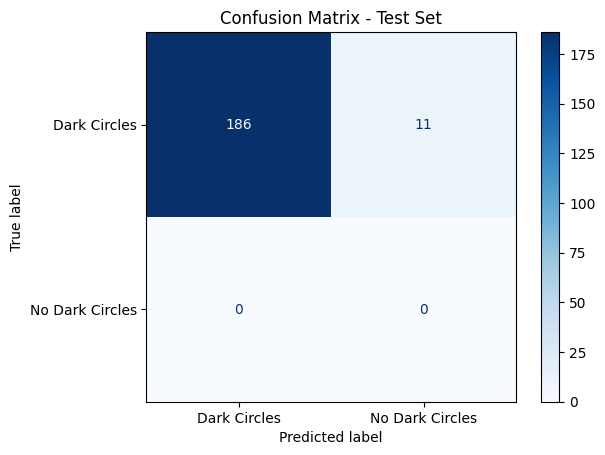

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ استخراج القيم الحقيقية (Ground Truth) من ملفات تصنيفات test
labels_dir = Path("/kaggle/working/DarkCircles/test/labels")
image_files = list(Path("/kaggle/working/DarkCircles/test/images").glob("*.jpg"))

y_true = []
for image_file in image_files:
    label_file = labels_dir / (image_file.stem + ".txt")
    if label_file.exists():
        with open(label_file, "r") as f:
            lines = f.readlines()
        # إذا كان هناك كائن class 0 → اعتبرها موجبة (positive)
        y_true.append(1 if any(line.strip().startswith("0 ") for line in lines) else 0)
    else:
        y_true.append(0)

# 2️⃣ استخراج القيم المتوقعة (Predicted Labels) من نموذج YOLO
results = model([str(p) for p in image_files])  # تأكدي من تمرير قائمة الصور كنصوص

# تحقق من عدد النتائج
if len(results) != len(image_files):
    raise ValueError(f"Mismatch: {len(image_files)} images vs {len(results)} YOLO results")

y_pred = []
for r in results:
    boxes = r.boxes
    pred_classes = boxes.cls.cpu().numpy() if boxes is not None else []
    y_pred.append(1 if 0 in pred_classes else 0)

# 3️⃣ حساب مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Dark Circles", "No Dark Circles"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()
